In [2]:
import pandas as pd
import numpy as np
import requests
import json
import yahoo_fin as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from env import headers_hist, headers_daily

In [3]:
def oil_api():
	url = "https://yahoo-finance97.p.rapidapi.com/price"

	payload = "symbol=CL=F&period=1d"


	response = requests.request("POST", url, data=payload, headers=headers_daily)

	return response



In [4]:
def all_oil():


    url = "https://yahoo-finance97.p.rapidapi.com/price-customdate"

    payload = "end=2022-08-30&symbol=CL%3DF&start=2002-01-01&period=1d"
   

    response_all = requests.request("POST", url, data=payload, headers=headers_hist)

    return response_all

In [5]:
oil_api()

<Response [200]>

In [4]:
response_all = all_oil()

In [5]:
hist = response_all.json()

In [6]:
oil_hist = pd.DataFrame(hist['data'])

oil_hist

,Adj Close,Close,Date,High,Low,Open,Volume
0,21.010000,21.010000,1009929600000,21.049999,19.850000,20.000000,69560
1,20.370001,20.370001,1010016000000,21.100000,20.150000,20.780001,64010
2,21.620001,21.620001,1010102400000,21.700001,20.400000,20.850000,84832
3,21.480000,21.480000,1010361600000,22.000000,21.200001,21.500000,64080
4,21.250000,21.250000,1010448000000,21.500000,21.000000,21.200001,59541
...,...,...,...,...,...,...,...
5188,93.739998,93.739998,1661212800000,94.220001,90.419998,90.550003,285607
5189,94.889999,94.889999,1661299200000,95.400002,92.790001,93.779999,320388
5190,92.519997,92.519997,1661385600000,95.760002,92.290001,95.349998,279877
5191,93.059998,93.059998,1661472000000,94.019997,91.080002,93.059998,288392


In [13]:
oil_hist.sort_values(by='Date', ascending=False)

,Adj Close,Close,Date,High,Low,Open,Volume
5192,97.010002,97.010002,1970-01-01 00:27:41.731200,97.370003,92.290001,92.959999,283463
5191,93.059998,93.059998,1970-01-01 00:27:41.472000,94.019997,91.080002,93.059998,288392
5190,92.519997,92.519997,1970-01-01 00:27:41.385600,95.760002,92.290001,95.349998,279877
5189,94.889999,94.889999,1970-01-01 00:27:41.299200,95.400002,92.790001,93.779999,320388
5188,93.739998,93.739998,1970-01-01 00:27:41.212800,94.220001,90.419998,90.550003,285607
...,...,...,...,...,...,...,...
4,21.250000,21.250000,1970-01-01 00:16:50.448000,21.500000,21.000000,21.200001,59541
3,21.480000,21.480000,1970-01-01 00:16:50.361600,22.000000,21.200001,21.500000,64080
2,21.620001,21.620001,1970-01-01 00:16:50.102400,21.700001,20.400000,20.850000,84832
1,20.370001,20.370001,1970-01-01 00:16:50.016000,21.100000,20.150000,20.780001,64010


In [7]:
oil_hist.dtypes

Adj Close    float64
Close        float64
Date           int64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [8]:
oil_hist.date = pd.to_datetime(oil_hist.Date)

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_95315/978622964.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  oil_hist.date = pd.to_datetime(oil_hist.Date)


In [7]:
def set_date(df):
    df.Date = pd.to_datetime(df['Date'],unit='ms')

    df = df.set_index('Date').sort_index()

    df['day_of_week'] = df.index.strftime('%A')

    df['month'] = df.index.strftime('%B')

    

    return df

In [8]:
oil_hist = set_date(oil_hist)

In [14]:
oil_hist['date'] = pd.to_datetime(oil_hist['Date'],unit='ms')

In [9]:
oil_hist.head()

,Adj Close,Close,High,Low,Open,Volume,day_of_week,month
Date,,,,,,,,
2002-01-02,21.010000,21.010000,21.049999,19.850000,20.000000,69560,Wednesday,January
2002-01-03,20.370001,20.370001,21.100000,20.150000,20.780001,64010,Thursday,January
2002-01-04,21.620001,21.620001,21.700001,20.400000,20.850000,84832,Friday,January
2002-01-07,21.480000,21.480000,22.000000,21.200001,21.500000,64080,Monday,January
2002-01-08,21.250000,21.250000,21.500000,21.000000,21.200001,59541,Tuesday,January


In [10]:
oil_hist.isnull().sum()

Adj Close      0
Close          0
High           0
Low            0
Open           0
Volume         0
day_of_week    0
month          0
dtype: int64

In [11]:
oil_hist.Close.min(), oil_hist.Close.max()


(-37.6300010681, 145.2899932861)

In [12]:
oil_hist.Open.min(), oil_hist.Open.max()

(-14.0, 145.1900024414)

In [13]:
oil_hist.Close.describe()

count    5193.000000
mean       65.598958
std        25.027364
min       -37.630001
25%        46.799999
50%        62.119999
75%        86.190002
max       145.289993
Name: Close, dtype: float64

In [15]:
oil_hist.Open.describe()

count    5193.000000
mean       65.594518
std        25.014875
min       -14.000000
25%        46.860001
50%        62.099998
75%        86.190002
max       145.190002
Name: Open, dtype: float64

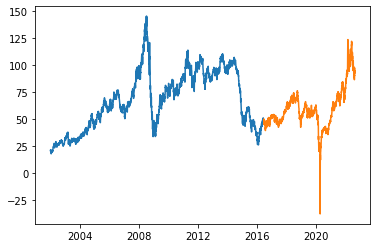

In [16]:
train_size = .70
n = oil_hist.shape[0]
test_start_index = round(train_size * n)

train = oil_hist[:test_start_index] # everything up (not including) to the test_start_index
test = oil_hist[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Close)
plt.plot(test.index, test.Close)


<AxesSubplot:ylabel='Frequency'>

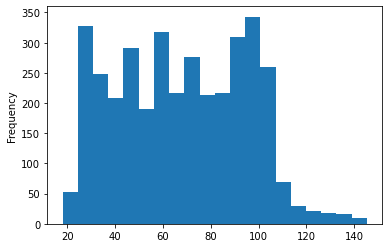

In [21]:
y = train.Close
y.plot.hist(bins=20)

In [18]:
train.head()

,Adj Close,Close,High,Low,Open,Volume,day_of_week,month
Date,,,,,,,,
2002-01-02,21.010000,21.010000,21.049999,19.850000,20.000000,69560,Wednesday,January
2002-01-03,20.370001,20.370001,21.100000,20.150000,20.780001,64010,Thursday,January
2002-01-04,21.620001,21.620001,21.700001,20.400000,20.850000,84832,Friday,January
2002-01-07,21.480000,21.480000,22.000000,21.200001,21.500000,64080,Monday,January
2002-01-08,21.250000,21.250000,21.500000,21.000000,21.200001,59541,Tuesday,January


[Text(0.5, 1.0, 'Average Close by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

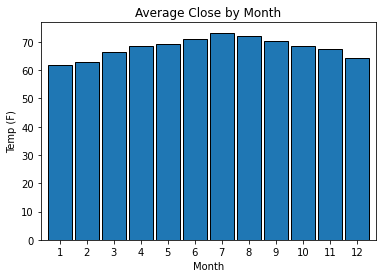

In [19]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Close by Month', xlabel='Month', ylabel='USD Price')


[Text(0.5, 1.0, 'Average Close by Month'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'USD Price')]

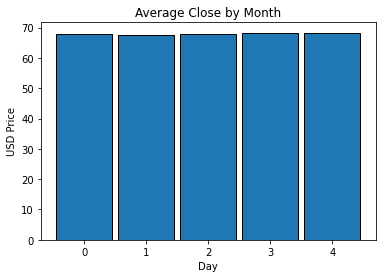

In [20]:
ax = y.groupby(y.index.day_of_week).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Close by Month', xlabel='Day', ylabel='USD Price')


Theres not a lot of variance within this daily price average

<AxesSubplot:xlabel='Date'>

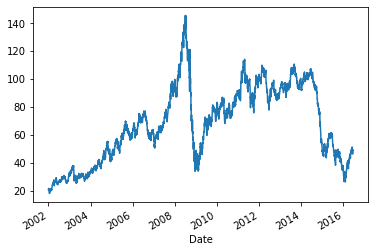

In [22]:
y.plot()

<AxesSubplot:title={'center':'2 Week average'}, xlabel='Date'>

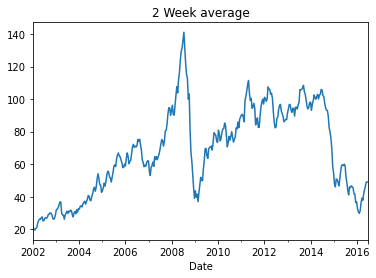

In [24]:
y.resample('2W').mean().plot(title='2 Week average')


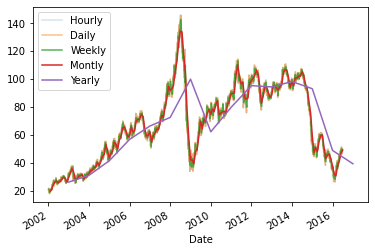

In [25]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


<AxesSubplot:title={'center':'Average week-to-week change in price'}, xlabel='Date'>

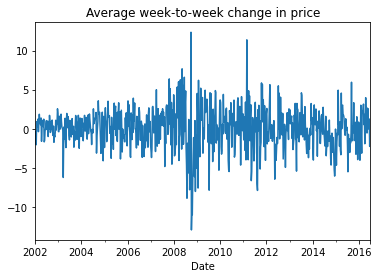

In [26]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in price')


<AxesSubplot:title={'center':'Average month-to-month change in price'}, xlabel='Date'>

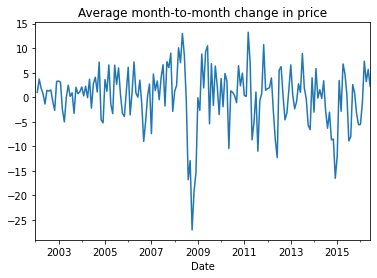

In [27]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in price')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

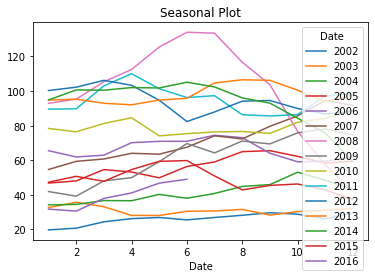

In [28]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


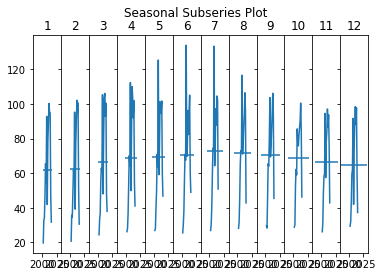

In [29]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


Text(0.5, 1.0, 'Lag plot with lag=1')

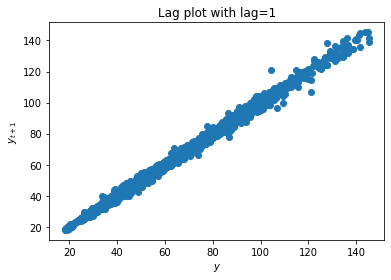

In [30]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


Text(0.5, 1.0, 'Lag plot with lag=1')

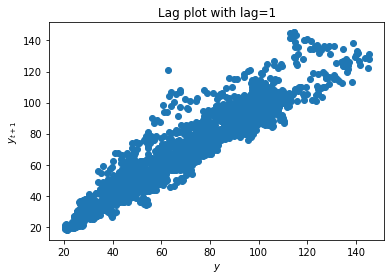

In [31]:
plt.scatter(y, y.shift(26))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

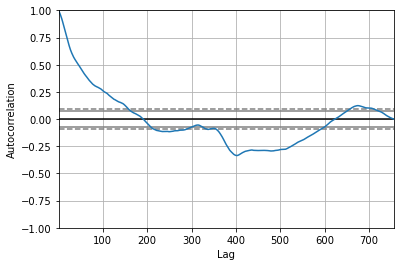

In [33]:
pd.plotting.autocorrelation_plot(train.Close.resample('W').mean())


Theres not a lot of seasonality shown on the charts here.

In [35]:
y = train.Close.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
Date,,,,
2002-01-06,21.000001,NaN,-5.081407,NaN
2002-01-13,20.594000,NaN,-3.656842,NaN
2002-01-20,18.538000,NaN,-3.408201,NaN
2002-01-27,19.450000,NaN,-4.923650,NaN
2002-02-03,19.730000,NaN,-4.842406,NaN


<AxesSubplot:xlabel='Date'>

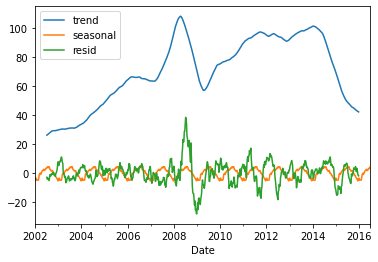

In [36]:
decomposition.iloc[:, 1:].plot()


Here we can see the seasonal trend that wasnt as clear in the above charts

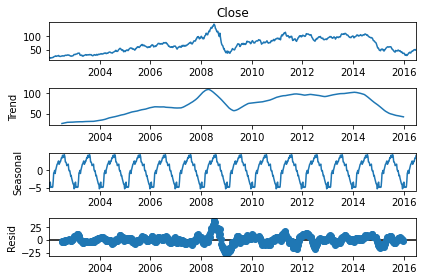

In [37]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None


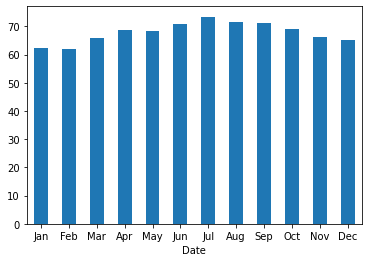

In [38]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None


#
---
### Modeling

In [49]:
train_size = int(len(oil_hist) * .5)
validate_size = int(len(oil_hist) * .3)
test_size = int(len(oil_hist) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = oil_hist[: train_size]
validate = oil_hist[train_size : validate_end_index]
test = oil_hist[validate_end_index : ]


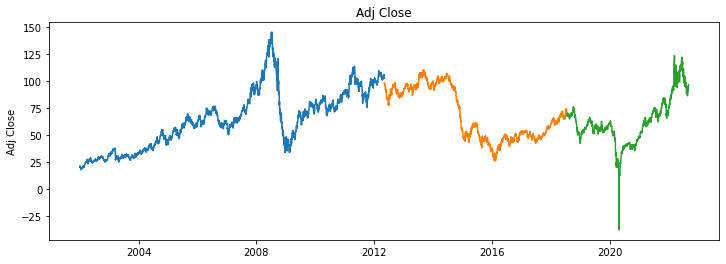

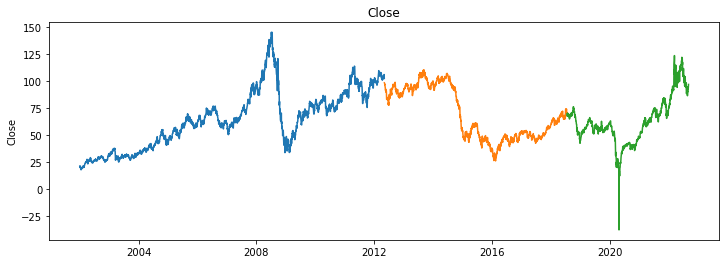

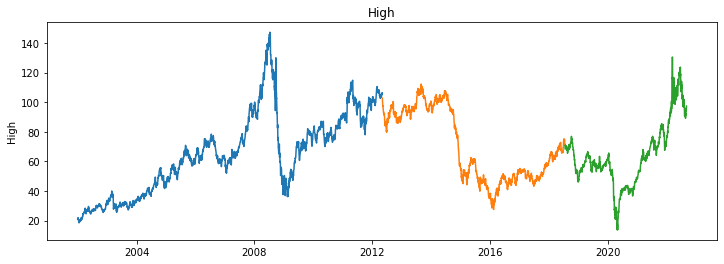

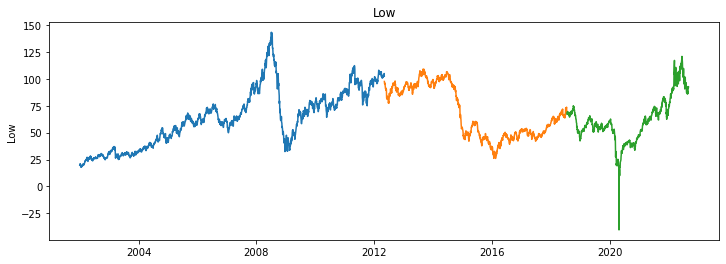

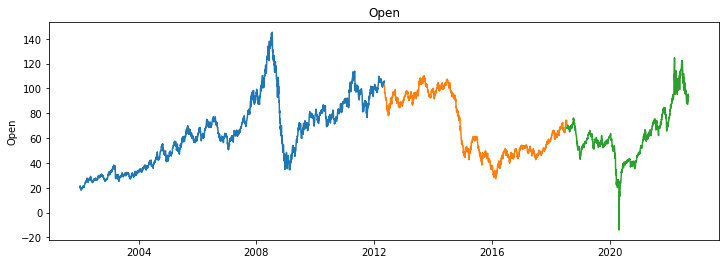

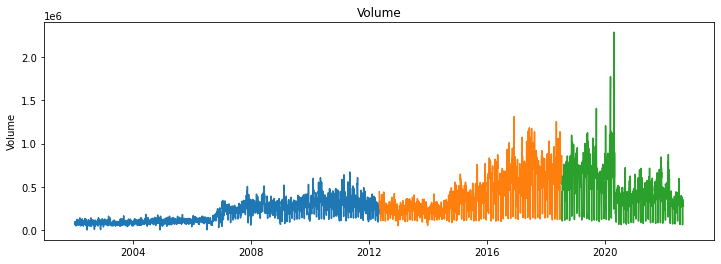

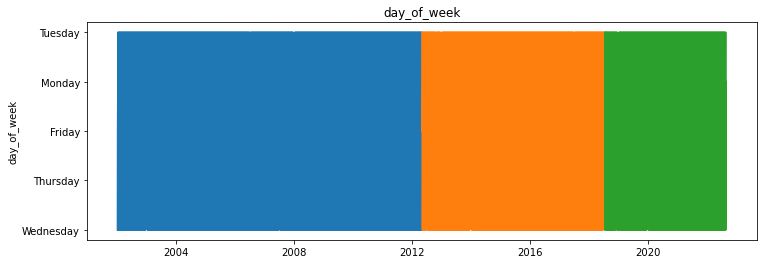

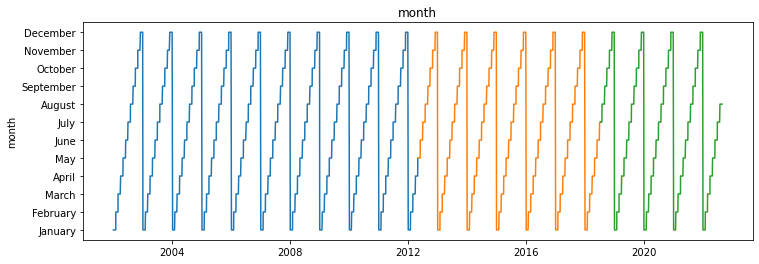

In [40]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()


In [44]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [48]:
evaluate(y)

KeyError: "None of [Float64Index([21.000000635766668,     20.59399986268, 18.538000106800002,\n                 19.449999809275,     19.72999954222,     19.95799980164,\n                  21.18799972534,     20.80749988555, 21.456000518819998,\n                  23.30400009156,\n              ...\n                  42.08000030518,     44.79199981688,     44.23799972534,\n                  45.44799957274,     48.02600021362,     49.01400070192,\n                   48.9749984741,     50.18199996948,     47.91399993896,\n                    49.109998703],\n             dtype='float64', length=756)] are in the [columns]"

In [45]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


Adj Close 



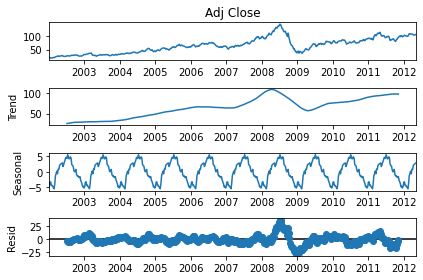

Close 



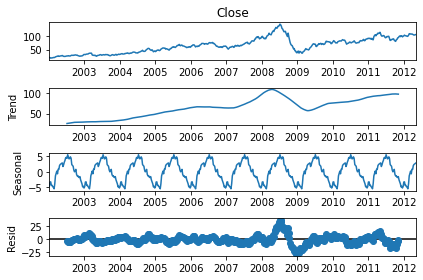

High 



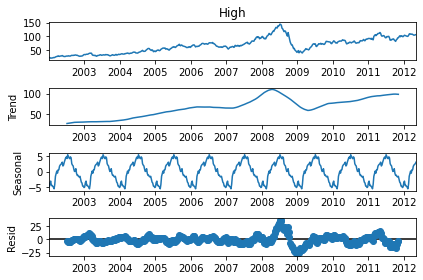

Low 



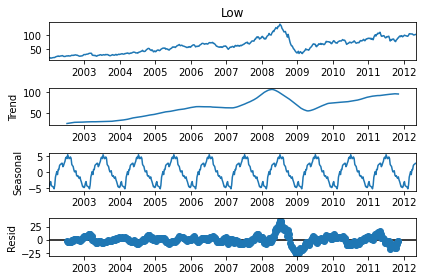

Open 



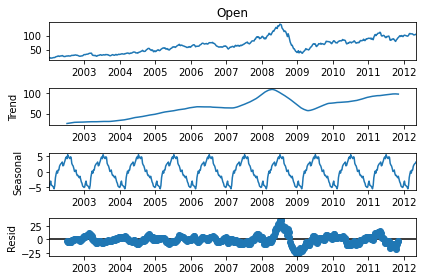

Volume 



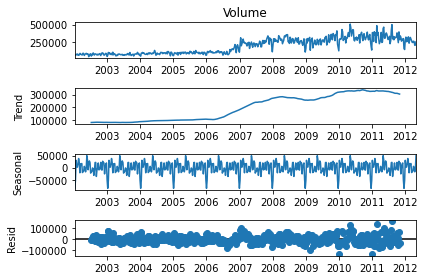

day_of_week 



TypeError: Could not convert WednesdayThursdayFriday to numeric

In [41]:
import statsmodels.api as sm

for col in train.columns:
    print(col,'\n')
    _ = sm.tsa.seasonal_decompose(train[col].resample('W').mean()).plot()
    plt.show()


In [ ]:
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)
